In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

def gaussian_noise(x, scale = 0.8): # 이미지에 가우스 노이즈를 추가하는 함수
    gaussian_data_x = x + np.random.normal(loc = 0,
                                           scale = scale, size = x.shape)
    
    # 이미지의 픽셀값을 0과 1사이로 정규롸
    gaussian_data_x = np.clip(gaussian_data_x, 0, 1)
    gaussian_data_x = torch.tensor(gaussian_data_x) # 토치 텐서로 변환
    gaussian_data_x = gaussian_data_x.type(torch.FloatTensor)
    return gaussian_data_x

/opt/conda/envs/bio/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


9913344it [00:00, 22359456.59it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



29696it [00:00, 25106642.13it/s]         

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



1649664it [00:00, 10767076.15it/s]                           


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



5120it [00:00, 16330674.13it/s]         

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw




/tmp/ipykernel_1383/2480407632.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gaussian_data_x = torch.tensor(gaussian_data_x) # 토치 텐서로 변환


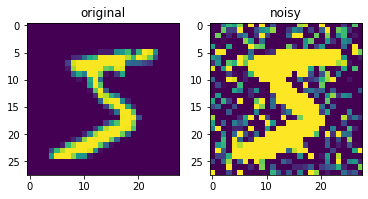

In [2]:
# 학습용 데이터 정의
training_data = MNIST(
    root = './',
    train = True,
    download = True,
    transform = ToTensor())

img = training_data.data[0]
gaussian = gaussian_noise(img)

plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('noisy')
plt.imshow(gaussian)

In [4]:
from torch.utils.data.dataset import Dataset

class Denoising(Dataset):
    def __init__(self):
        self.mnist = MNIST(
            root = './',
            train = True,
            download = True,
            transform = ToTensor())
        self.data = [] # 노이즈가 낀 데이터를 담는 리스트
        for i in range(len(self.mnist)):
            noisy_input = gaussian_noise(self.mnist.data[i])
            input_tensor = torch.tensor(noisy_input)
            self.data.append(torch.unsqueeze(input_tensor, dim=0))
    def __len__(self):
        return len(self.data)
    
    def __get__(self,i):
        data = self.data[i]
        
        # 원본 이미지도 0과 1사이로 값을 맞춰줌
        label = self.mnist.data[i]/255
        
        return data, label
        
            

In [5]:
import torch.nn as nn

class BasicBlock(nn.Module):  # 4장에서 사용한 기본 블록 이용
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        
        self.conv1 = nn.Conv2d(
            in_channels,
            hidden_dim,
            kernel_size = 3,
            padding =1)
        self.conv2 = nn.Conv2d(
            hidden_dim,
            out_channels,
            kernel_size = 3,
            padding =1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        
        return x

        


In [7]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        
        self.conv1 = BasicBlock(in_channels = 1, out_channels = 16, hidden_dim = 16)
        self.conv2 = BasicBlock(in_channels = 16, out_channels = 8, hidden_dim = 8)
        
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        
    def forward(self, x):  # cnn과 동일하게 합성곱층을 거치고 풀링을 해줌
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(X)
        
        return x
        


In [ ]:
: